BigMac Index

Dataset: BigMacPrice --> https://www.kaggle.com/datasets/vittoriogiatti/bigmacprice?resource=download

PPI: https://data.oecd.org/price/producer-price-indices-ppi.htm#indicator-chart

Forex: https://pypi.org/project/forex-python/

Questions:
- Can we predict (some price indicator)
- How did the price develop
- Does it grow at the same pace
- Does the exchange rate reflect the price difference

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.2f' % x)

df = pd.read_pickle('BigMacPrices_cleaned')
df = df.dropna(subset=['dollar_ex_adjusted'])
df.head()

,date,currency_code,name,local_price,dollar_ex_adjusted,Value,local_price_comparison,expected_price,diff_local,dollar_price_adjusted,diff_dollar,perc_diff
1,2000-04-01,AUD,Australia,2.59,1.68,NaN,2.24,3.76,-1.17,1.54,-0.70,-31.25
3,2000-04-01,GBP,Britain,1.90,0.63,73.83,2.24,1.41,0.49,3.01,0.77,34.38
4,2000-04-01,CAD,Canada,2.85,1.47,NaN,2.24,3.30,-0.45,1.93,-0.31,-13.84
7,2000-04-01,CZK,Czech Republic,54.37,38.20,NaN,2.24,85.57,-31.20,1.42,-0.82,-36.61
8,2000-04-01,DKK,Denmark,24.75,7.81,72.79,2.24,17.49,7.26,3.17,0.93,41.52


In [2]:
def plot_graph_country(df, country):
    plot_df = df[df.name == country]
    plot_df = plot_df.set_index('date')

    # More versatile wrapper
    fig, host = plt.subplots(figsize=(8,5)) # (width, height) in inches
    # (see https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplots.html)

    par1 = host.twinx()

    host.set_xlabel("Date")
    host.set_ylabel("Local Price")
    par1.set_ylabel("Dollar Price")


    p1, = host.plot(plot_df.index, plot_df.local_price, label="Local Price (Local Currency)", color='red')
    p2, = par1.plot(plot_df.index, plot_df.dollar_price_adjusted, label=f"Dollar Price {country}", color = 'green')
    p3, = par1.plot(plot_df.index, plot_df.local_price_comparison, label="Dollar Price USD", color = 'blue')

    lns = [p1,
           p2,
           p3
          ]
    host.legend(handles=lns, loc='best')

    # Adjust spacings w.r.t. figsize
    fig.tight_layout()
    plt.title(f'Price flow for {country}')
    # Best for professional typesetting, e.g. LaTeX
    plt.plot()

# Average Price Difference over full time period

If we look at the average difference between the expected price (converted to dollars) per country and the actual price in the US, we notice there are 2 clear outliers, namely Venezuela and Lebanon. Let's have a closer look at them.

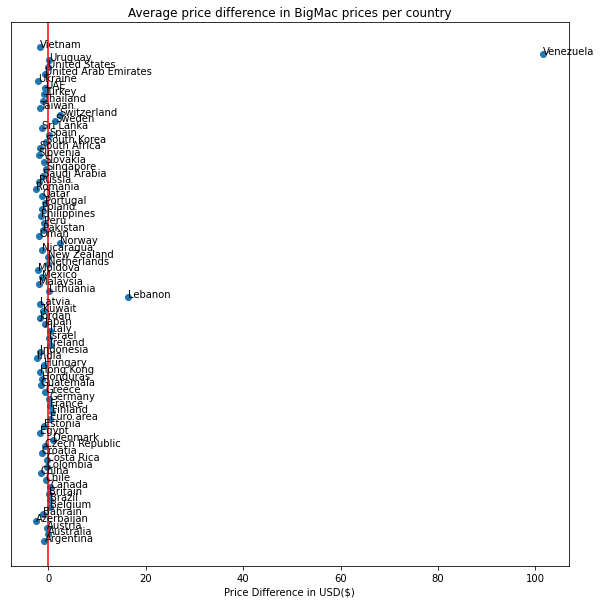

In [3]:
# Check which countries are on average over/undervalued based on the BigMacPrice
df_grouped = df[['diff_dollar', 'name']].groupby('name').aggregate([np.mean])
x=df_grouped[('diff_dollar', 'mean')]
y=df_grouped.index

fig, ax = plt.subplots(figsize=(10,10))
plt.axvline(x=0, color='r', label='Expected price difference')
plt.xlabel('Price Difference in USD($)')
plt.title('Average price difference in BigMac prices per country')
ax.set_yticks([])
ax.scatter(x, y)

for i, txt in enumerate(df_grouped.index):
    ax.annotate(txt, (x[i], y[i]))

# What happened in Venezuela and Lebanon?

If we check how the price of big mac in combination with the exchange rates developed in both countries, we see a huge spike in local prices, while the exchange rate took some time to adjust for it and get the dollar converted prices closer to the USD price.

After some research the conclusion can be drawn that for both countries this is due to some financial distress resulting in hyperinflation.
Links: 
- Lebanon: https://atalayar.com/en/content/lebanons-hyperinflation-continues-drive-purchasing-costs
- Venezuela: https://www.pbs.org/wgbh/frontline/article/timeline-how-the-crisis-in-venezuela-unfolded/

Besides, Venezuela does not seem to have price data for the period of 2018-2020, while introducing a new currency in 2021.
Even after the introduction of this new currency the price for big macs started of very unstable as well starting from a price of over 16mln VES in july 2021 to only 23 VES in january 2022. 

Given this financial instability for both countries, they do not seem to be good indicators for Big Mac Prices in combination with exchange rates and are therefore dropped from the sample
        

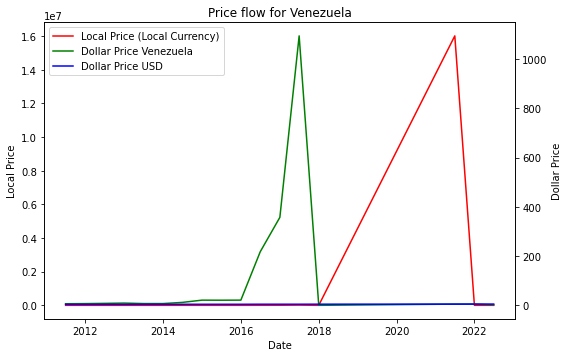

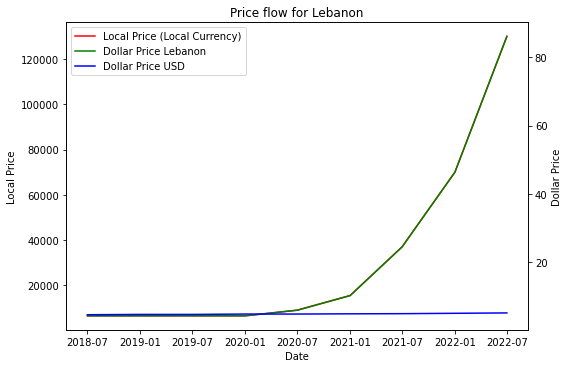

In [4]:
plot_graph_country(df, 'Venezuela')
plot_graph_country(df, 'Lebanon')

In [10]:
df[df.name == "Venezuela"][['date', 'currency_code', 'name', 'local_price',
                            'dollar_ex_adjusted', 'local_price_comparison', 'dollar_price_adjusted']]

,date,currency_code,name,local_price,dollar_ex_adjusted,local_price_comparison,dollar_price_adjusted
574,2011-07-01,VEF,Venezuela,28.00,4.30,3.64,6.51
629,2012-01-01,VEF,Venezuela,30.00,4.30,3.81,6.97
682,2012-07-01,VEF,Venezuela,34.00,4.29,3.96,7.93
737,2013-01-01,VEF,Venezuela,39.00,4.29,4.03,9.09
792,2013-07-01,VEF,Venezuela,45.00,6.29,4.18,7.16
848,2014-01-01,VEF,Venezuela,45.00,6.29,4.24,7.15
904,2014-07-01,VEF,Venezuela,75.00,6.29,4.29,11.93
960,2015-01-01,VEF,Venezuela,132.00,6.28,4.29,21.03
1016,2015-07-01,VEF,Venezuela,132.00,6.34,4.29,20.82
1072,2016-01-01,VEF,Venezuela,132.00,6.24,4.29,21.14


In [5]:
df[df.name == "Lebanon"][['date', 'currency_code', 'name', 'local_price',
                            'dollar_ex_adjusted', 'local_price_comparison', 'dollar_price_adjusted']]

,date,currency_code,name,local_price,dollar_ex_adjusted,local_price_comparison,dollar_price_adjusted
1334,2018-07-01,LBP,Lebanon,6500.00,1510.40,4.62,4.30
1406,2019-01-01,LBP,Lebanon,6500.00,1507.40,4.71,4.31
1478,2019-07-01,LBP,Lebanon,6500.00,1505.95,4.71,4.32
1550,2020-01-01,LBP,Lebanon,6500.00,1507.98,4.82,4.31
1622,2020-07-01,LBP,Lebanon,9000.00,1512.22,4.82,5.95
1694,2021-01-01,LBP,Lebanon,15500.00,1517.53,4.89,10.21
1766,2021-07-01,LBP,Lebanon,37000.00,1512.10,4.93,24.47
1839,2022-01-01,LBP,Lebanon,70000.00,1509.90,5.04,46.36
1911,2022-07-01,LBP,Lebanon,130000.00,1508.94,5.15,86.15


In [6]:
exclude = ['Venezuela', 'Lebanon']
df = df[~df.name.isin(exclude)]

# Average price difference after excluding Lebanon and Venezuela

After excluding both outliers and checking again for the average price difference in big mac prices per country in relation to the USD Big Mac price ranges from -2.8 dollar (Romania / Azerbaijan) to approximately +2.4 (Switzerland / Norway).

If Big Mac prices would be a perfect indication of exchange rates, the price difference would be $0 (see red line in the graph underneath), which is seems, on average, to be the case for The Netherlands, Australia and New Zealand.

However, in general most countries seem to, on average, have relatively cheaper Big Macs than the US while countries that have more expensive burgers are mostly more developed western countries, like western European and Scandinavion nations. 

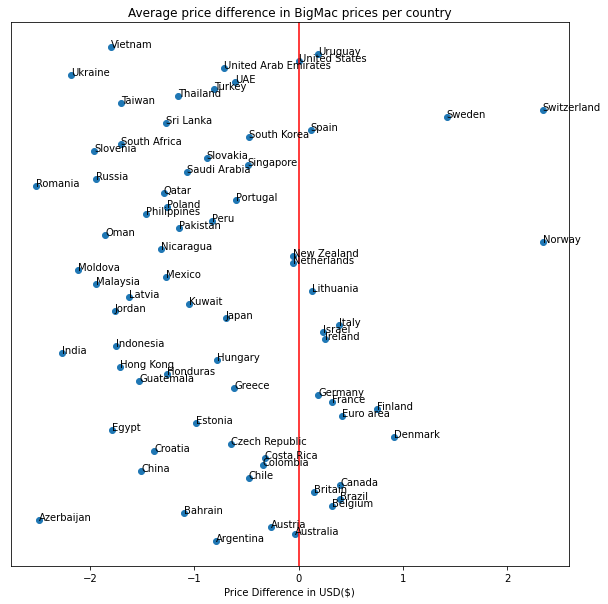

In [12]:
# Check which countries are on average over/undervalued based on the BigMacPrice
df_grouped = df[~df.name.isin(exclude)][['diff_dollar', 'name']].groupby('name').aggregate([np.mean])
x=df_grouped[('diff_dollar', 'mean')]
y=df_grouped.index

fig, ax = plt.subplots(figsize=(10,10))
plt.axvline(x=0, color='r', label='Expected price difference')
plt.xlabel('Price Difference in USD($)')
plt.title('Average price difference in BigMac prices per country')
ax.set_yticks([])
ax.scatter(x, y)

for i, txt in enumerate(df_grouped.index):
    ax.annotate(txt, (x[i], y[i]))

# Price graphs relatively expensive Big Mac

If we check the pricegraphs for the countries that on average deviate the most from the USD price, we see that for Switzerland and Norway the dollar price is larger (Green line) than the price in the US (Blue line), at some points in time it is almost double the price of the US-big mac price (e.g. Norway ~2008).

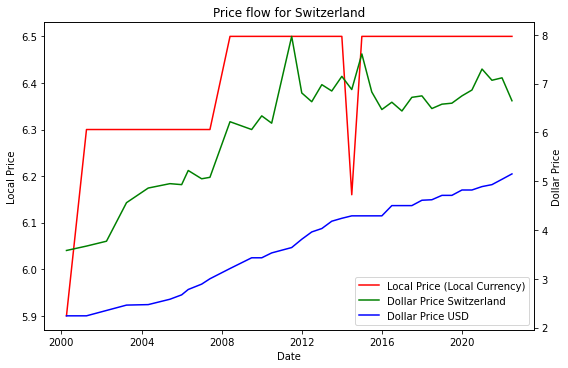

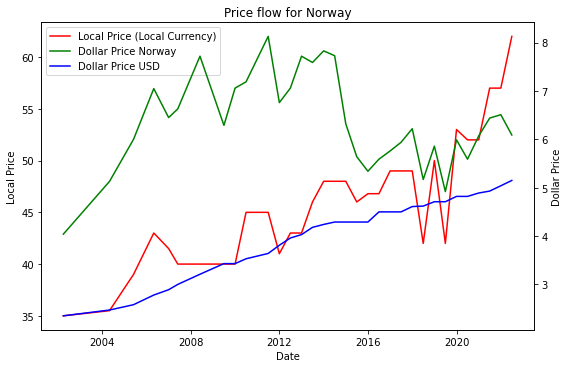

In [8]:
plot_graph_country(df, 'Switzerland')
plot_graph_country(df, 'Norway')


# Price graphs relatively cheap Big Macs

When checking the price-graphs for countries on the other end of the spectrum, we see an opposite trend as for Norway and Switzerland, where in Azerbaijan and Romania the Local dollar price (green) seems to be around half of the dollar price in the US (blue). 
Also, despite that the Big Mac prices in the local currency seems to gradually increase for those countries, the dollar exchange rate corrects for it, keeping the dollar price around the same level.

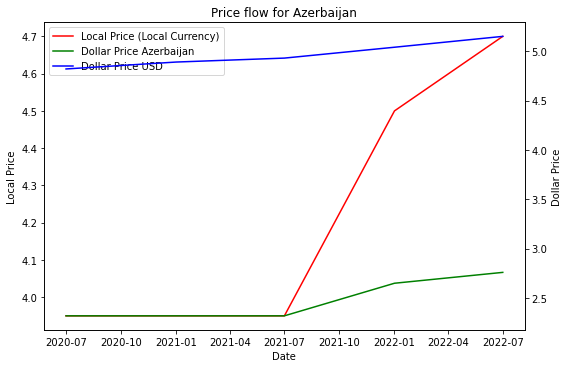

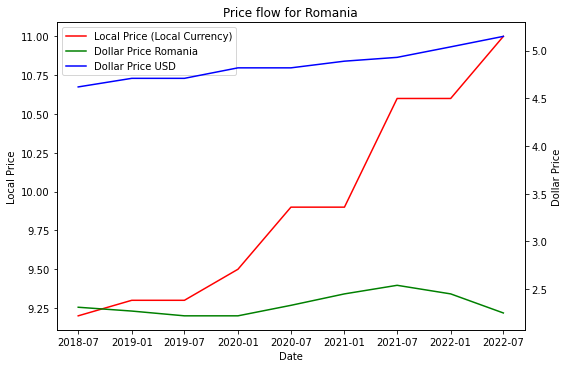

In [9]:
plot_graph_country(df, 'Azerbaijan')
plot_graph_country(df, 'Romania')

In [47]:
from datetime import datetime

f1 = df.date >= datetime(2015, 1, 1)
f2 = df.date <= (datetime(2016,1,1))
f3 = df.Value.isnull()

avg2015 = df[f1&f2&~f3][['local_price', 'name']].groupby('name').aggregate([np.mean])
avg2015.columns = ['local_avg2015']
avg2015

,local_avg2015
name,
Austria,3.43
Belgium,3.78
Britain,2.89
Colombia,7900.00
Costa Rica,2150.00
Denmark,33.03
Estonia,2.95
Finland,4.10
France,4.03


In [55]:
cols = ['date', 'currency_code', 'name', 'local_price', 'Value']

df_ppi = df[~df.Value.isnull()][cols]
df_ppi = pd.merge(df_ppi, avg2015, left_on='name', right_index=True)
df_ppi['bm_idx2015'] = (df_ppi['local_price'] / df_ppi['local_avg2015']) * 100
df_ppi['diff_idx2015'] = df_ppi['Value'] - df_ppi['bm_idx2015']
df_ppi

,date,currency_code,name,local_price,Value,local_avg2015,bm_idx2015,diff_idx2015
3,2000-04-01,GBP,Britain,1.90,73.83,2.89,65.74,8.09
31,2001-04-01,GBP,Britain,1.99,74.07,2.89,68.86,5.21
59,2002-04-01,GBP,Britain,1.99,73.83,2.89,68.86,4.98
92,2003-04-01,GBP,Britain,1.99,74.87,2.89,68.86,6.01
124,2004-05-01,GBP,Britain,1.88,75.98,2.89,65.05,10.92
...,...,...,...,...,...,...,...,...
1646,2020-07-01,EUR,Spain,4.10,101.09,3.60,113.89,-12.80
1718,2021-01-01,EUR,Spain,4.33,104.17,3.60,120.28,-16.11
1790,2021-07-01,EUR,Spain,4.40,112.67,3.60,122.22,-9.55
1863,2022-01-01,EUR,Spain,4.58,121.03,3.60,127.22,-6.20


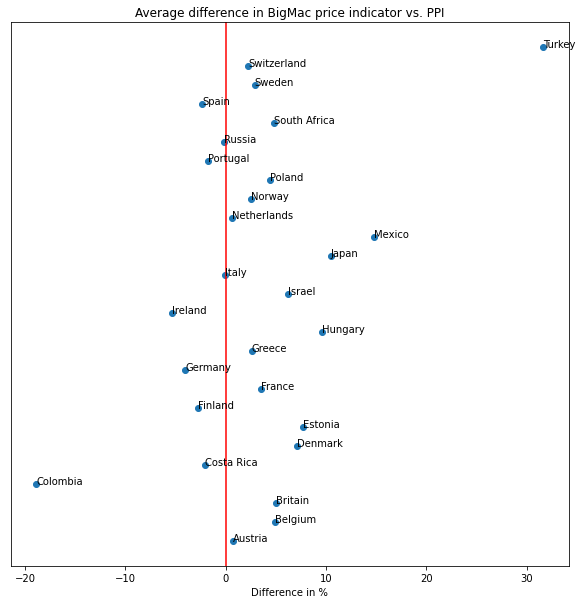

In [56]:
# Check which countries are on average over/undervalued based on the BigMacPrice
df_grouped = df_ppi[['diff_idx2015', 'name']].groupby('name').aggregate([np.mean])
x=df_grouped[('diff_idx2015', 'mean')]
y=df_grouped.index

fig, ax = plt.subplots(figsize=(10,10))
plt.axvline(x=0, color='r', label='Difference PPI vs. BigMac-Indicator')
plt.xlabel('Difference in %')
plt.title('Average difference in BigMac price indicator vs. PPI')
ax.set_yticks([])
ax.scatter(x, y)

for i, txt in enumerate(df_grouped.index):
    ax.annotate(txt, (x[i], y[i]))

In [10]:
df.sort_values(['name', 'date'], inplace=True)
df['diffs'] = df['dollar_price_adjusted'].diff()

In [11]:
mask = df.name != df.name.shift(1)
df['diffs'][mask] = np.nan

C:\Users\C77561\AppData\Local\Temp\ipykernel_24512\3673397972.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diffs'][mask] = np.nan


In [12]:
df[~df.diffs.isnull()].sort_values('diffs').head(15)

,date,currency_code,name,local_price,dollar_ex_adjusted,Value,local_price_comparison,expected_price,diff_local,dollar_price_adjusted,diff_dollar,perc_diff,diffs
1335,2018-07-01,EUR,Lithuania,2.80,0.86,105.60,4.62,3.96,-1.16,3.27,-1.35,-29.22,-8.88
720,2013-01-01,EUR,Portugal,2.95,0.75,111.50,4.03,3.03,-0.08,3.93,-0.10,-2.48,-2.13
620,2012-01-01,SEK,Sweden,41.00,7.01,99.51,3.81,26.70,14.30,5.85,2.04,53.54,-1.61
418,2009-07-01,NOK,Norway,40.00,6.36,87.11,3.43,21.83,18.17,6.29,2.86,83.38,-1.43
938,2015-01-01,NOK,Norway,48.00,7.60,98.62,4.29,32.59,15.41,6.32,2.03,47.32,-1.41
915,2015-01-01,COP,Colombia,7900.00,2396.15,96.43,4.29,10279.48,-2379.48,3.30,-0.99,-23.08,-1.40
607,2012-01-01,NOK,Norway,41.00,6.06,97.22,3.81,23.11,17.89,6.76,2.95,77.43,-1.37
596,2012-01-01,HUF,Hungary,645.00,245.14,101.63,3.81,933.99,-288.99,2.63,-1.18,-30.97,-1.37
429,2009-07-01,SEK,Sweden,39.00,7.79,98.41,3.43,26.72,12.28,5.01,1.58,46.06,-1.29
1298,2018-07-01,ARS,Argentina,75.00,27.27,NaN,4.62,125.97,-50.97,2.75,-1.87,-40.48,-1.25


In [14]:
# Check if PPI data for all countries and currencies

only_nulls = []
full_period = []
semi_period = []

for c in df.name.unique():
    total = len(df[df.name == c])
    nulls = np.sum(df[df.name == c].Value.isnull())
    if total == nulls:
        only_nulls += [c]
    elif nulls == 0:
        full_period += [c]
    else:
        semi_period += [c]
        
print(f"No PPI Data: {len(only_nulls)}")
print(f"PPI Data full period: {len(full_period)}")
print(f"Partly PPI data: {len(semi_period)}")         

No PPI Data: 41
PPI Data full period: 30
Partly PPI data: 1


In [15]:
semi_period

['Switzerland']

In [16]:
df[df.name == "Switzerland"]

,date,currency_code,name,local_price,dollar_ex_adjusted,Value,local_price_comparison,expected_price,diff_local,dollar_price_adjusted,diff_dollar,perc_diff,diffs
24,2000-04-01,CHF,Switzerland,5.90,1.65,NaN,2.24,3.70,2.20,3.58,1.34,59.82,NaN
52,2001-04-01,CHF,Switzerland,6.30,1.72,NaN,2.24,3.84,2.46,3.67,1.43,63.84,0.09
83,2002-04-01,CHF,Switzerland,6.30,1.67,NaN,2.35,3.92,2.38,3.77,1.42,60.43,0.10
115,2003-04-01,CHF,Switzerland,6.30,1.38,93.64,2.46,3.40,2.90,4.56,2.10,85.37,0.79
153,2004-05-01,CHF,Switzerland,6.30,1.30,95.79,2.47,3.20,3.10,4.86,2.39,96.76,0.30
193,2005-06-01,CHF,Switzerland,6.30,1.27,97.09,2.58,3.28,3.02,4.95,2.37,91.86,0.09
228,2006-01-01,CHF,Switzerland,6.30,1.28,98.11,2.67,3.42,2.88,4.93,2.26,84.64,-0.02
266,2006-05-01,CHF,Switzerland,6.30,1.21,100.08,2.78,3.36,2.94,5.22,2.44,87.77,0.29
307,2007-01-01,CHF,Switzerland,6.30,1.25,100.28,2.89,3.61,2.69,5.05,2.16,74.74,-0.17
348,2007-06-01,CHF,Switzerland,6.30,1.24,103.32,3.00,3.72,2.58,5.08,2.08,69.33,0.03


,date,currency_code,name,local_price,dollar_ex_adjusted,Value,local_price_comparison,expected_price,diff_local,dollar_price_adjusted,diff_dollar,perc_diff,diffs
908,2015-01-01,EUR,Austria,3.39,0.86,99.70,4.29,3.69,-0.30,3.94,-0.35,-8.16,-0.66
964,2015-07-01,EUR,Austria,3.39,0.91,100.30,4.29,3.92,-0.53,3.71,-0.58,-13.52,-0.23
1020,2016-01-01,EUR,Austria,3.50,0.92,98.20,4.29,3.95,-0.45,3.80,-0.49,-11.42,0.09
909,2015-01-01,EUR,Belgium,3.70,0.86,98.20,4.29,3.69,0.01,4.31,0.02,0.47,-0.71
965,2015-07-01,EUR,Belgium,3.70,0.91,101.90,4.29,3.92,-0.22,4.05,-0.24,-5.59,-0.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,2015-07-01,CHF,Switzerland,6.50,0.95,99.82,4.29,4.08,2.42,6.83,2.54,59.21,-0.78
1064,2016-01-01,CHF,Switzerland,6.50,1.01,98.55,4.29,4.31,2.19,6.47,2.18,50.82,-0.36
955,2015-01-01,TRY,Turkey,9.25,2.31,95.22,4.29,9.89,-0.64,4.01,-0.28,-6.53,-0.35
1011,2015-07-01,TRY,Turkey,10.25,2.65,100.57,4.29,11.35,-1.10,3.87,-0.42,-9.79,-0.14


In [25]:
df_cpi = pd.read_csv('CPI_07122022080621228.csv')
df_cpi.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,CPI,ENRG,AGRWTH,A,1972,4.91,NaN
1,AUS,CPI,ENRG,AGRWTH,A,1973,3.76,NaN
2,AUS,CPI,ENRG,AGRWTH,A,1974,13.17,NaN
3,AUS,CPI,ENRG,AGRWTH,A,1975,19.42,NaN
4,AUS,CPI,ENRG,AGRWTH,A,1976,8.83,NaN


In [26]:
df_cpi[df_cpi.LOCATION == "NLD"]

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
2933,NLD,CPI,ENRG,AGRWTH,A,1961,0.25,NaN
2934,NLD,CPI,ENRG,AGRWTH,A,1962,1.58,NaN
2935,NLD,CPI,ENRG,AGRWTH,A,1963,4.00,NaN
2936,NLD,CPI,ENRG,AGRWTH,A,1964,2.91,NaN
2937,NLD,CPI,ENRG,AGRWTH,A,1965,0.58,NaN
...,...,...,...,...,...,...,...,...
235653,NLD,CPI,TOT_FOODENRG,IDX2015,M,2022-06,113.34,NaN
235654,NLD,CPI,TOT_FOODENRG,IDX2015,M,2022-07,114.77,NaN
235655,NLD,CPI,TOT_FOODENRG,IDX2015,M,2022-08,115.39,NaN
235656,NLD,CPI,TOT_FOODENRG,IDX2015,M,2022-09,115.96,NaN


In [27]:
df[df.name == "Netherlands"]

,date,currency_code,name,local_price,dollar_ex_adjusted,Value,local_price_comparison,expected_price,diff_local,dollar_price_adjusted,diff_dollar,perc_diff
550,2011-07-01,EUR,Netherlands,3.25,0.71,107.40,3.64,2.57,0.68,4.60,0.96,26.37
605,2012-01-01,EUR,Netherlands,3.25,0.79,103.80,3.81,3.01,0.24,4.11,0.30,7.87
659,2012-07-01,EUR,Netherlands,3.38,0.82,105.20,3.96,3.23,0.15,4.14,0.18,4.55
713,2013-01-01,EUR,Netherlands,3.45,0.75,106.30,4.03,3.03,0.42,4.59,0.56,13.90
768,2013-07-01,EUR,Netherlands,3.45,0.77,105.10,4.18,3.20,0.25,4.51,0.33,7.89
824,2014-01-01,EUR,Netherlands,3.45,0.74,104.80,4.24,3.12,0.33,4.69,0.45,10.61
880,2014-07-01,EUR,Netherlands,3.45,0.74,105.20,4.29,3.16,0.29,4.68,0.39,9.09
936,2015-01-01,EUR,Netherlands,3.45,0.86,98.60,4.29,3.69,-0.24,4.01,-0.28,-6.53
992,2015-07-01,EUR,Netherlands,3.45,0.91,101.70,4.29,3.92,-0.47,3.78,-0.51,-11.89
1048,2016-01-01,EUR,Netherlands,3.45,0.92,97.00,4.29,3.95,-0.50,3.75,-0.54,-12.59
